In [ ]:
#경로 설정
import os
os.chdir('C:/음악/trim/trim')


#audio list 뽑기
audio_list = os.listdir('C:/음악/trim/trim')


In [ ]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import minmax_scale

In [ ]:
# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 512

#melspectogram list
list = []

for i in tqdm(range(1,1001)):
    signal, sr = librosa.load('C:/음악/trim/trim/'+str(i)+'.wav', sr = 44100)
    mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    list.append(power_to_db)



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:52<00:00,  8.90it/s]


In [ ]:
#melspectogram list 저장
np.save('./melspectogram.npy', list)

In [ ]:
#불러오기 되는지 확인
a = np.load('melspectogram.npy')

In [ ]:
list[7].shape

(128, 2584)

In [ ]:
def extract_feature_means(y, r) -> pd.DataFrame:
    # config settings
    # number_of_mfcc = c.NUMBER_OF_MFCC

    # 1. Importing 1 file
    
    
    D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512)) #n_fft : window size / 이 때, 음성의 길이를 얼마만큼으로 자를 것인가? 를 window라고 부른다.
    DB = librosa.amplitude_to_db(D, ref=np.max)
    
    S = librosa.feature.melspectrogram(y, sr=sr)
    S_DB = librosa.amplitude_to_db(S, ref=np.max)
    
    tempo , _ = librosa.beat.beat_track(y,sr=sr) 
    
    zero_crossings = librosa.zero_crossings(y, pad=False)
    
    y_harm, y_perc = librosa.effects.hpss(y)
    
    spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
    
    spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]
    
    
    mfccs = librosa.feature.mfcc(y, sr=sr)
    mfccs = minmax_scale(mfccs,axis=1)
    
    chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)
    
    spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

    spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y, sr=sr)[0]
    spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y, sr=sr, p=3)[0]
    spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y, sr=sr, p=4)[0]

    audio_features = {
        "zero_crossing_rate": np.mean(librosa.feature.zero_crossing_rate(y)[0]),
        "zero_crossings": np.sum(librosa.zero_crossings(y, pad=False)),
        "spectrogram": np.mean(DB[0]),
        #"mel_spectrogram": np.mean(S_DB[0]),
        "harmonics": np.mean(y_harm),
        "perceptual_shock_wave": np.mean(y_perc),
        "spectral_centroids": np.mean(spectral_centroids),
        #"spectral_centroids_delta": np.mean(spectral_centroids_delta),
        #"spectral_centroids_accelerate": np.mean(spectral_centroids_accelerate),
        "chroma1": np.mean(chromagram[0]),
        "chroma2": np.mean(chromagram[1]),
        "chroma3": np.mean(chromagram[2]),
        "chroma4": np.mean(chromagram[3]),
        "chroma5": np.mean(chromagram[4]),
        "chroma6": np.mean(chromagram[5]),
        "chroma7": np.mean(chromagram[6]),
        "chroma8": np.mean(chromagram[7]),
        "chroma9": np.mean(chromagram[8]),
        "chroma10": np.mean(chromagram[9]),
        "chroma11": np.mean(chromagram[10]),
        "chroma12": np.mean(chromagram[11]),
        "tempo_bpm": tempo,
        "spectral_rolloff": np.mean(spectral_rolloff),
        #"spectral_flux": np.mean(onset_env),
        "spectral_bandwidth_2": np.mean(spectral_bandwidth_2),
        "spectral_bandwidth_3": np.mean(spectral_bandwidth_3),
        "spectral_bandwidth_4": np.mean(spectral_bandwidth_4),
    }

    # extract mfcc feature
    #mfcc_df = extract_mfcc_feature_means(audio_path,
    #                                y,
    #                                sample_rate=sr,
    #                                number_of_mfcc=number_of_mfcc)

    df = pd.DataFrame.from_records(data=[audio_features])
    df = np.array(df).squeeze()
    #df = pd.merge(df, mfcc_df, on='file_name')

    return df

In [ ]:
#feature 만들기

# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 512

list1 = []

for i in tqdm(range(1,1001)):
    signal, sr = librosa.load('C:/음악/trim/trim/'+str(i)+'.wav', sr = 44100)
    list1.append(extract_feature_means(signal, sr))
    

In [ ]:
list2 = pd.DataFrame(list1)

list2.to_csv('./features.csv', index = False)

In [ ]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(signal, sr=sr)
plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()

In [ ]:
import IPython.display as ipd
ipd.Audio(signal, rate=sr)

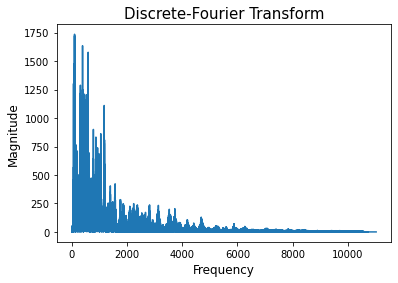

In [ ]:
# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(signal)
# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)
# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sr, len(magnitude))
# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)]
plt.plot(left_freq, left_mag)
plt.title('Discrete-Fourier Transform', fontdict=dict(size=15))
plt.xlabel('Frequency', fontdict=dict(size=12))
plt.ylabel('Magnitude', fontdict=dict(size=12))
plt.show()

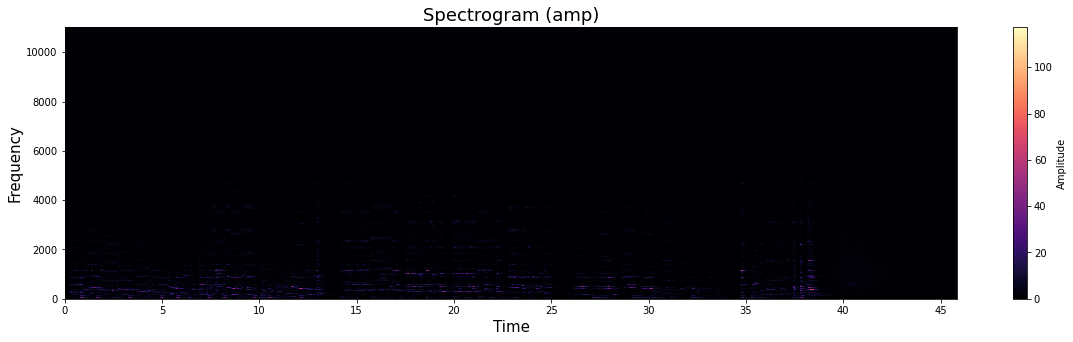

In [ ]:
# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 512
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)
# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))
# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis= 'hz', hop_length=hop_length)
plt.colorbar(label='Amplitude')
plt.title('Spectrogram (amp)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

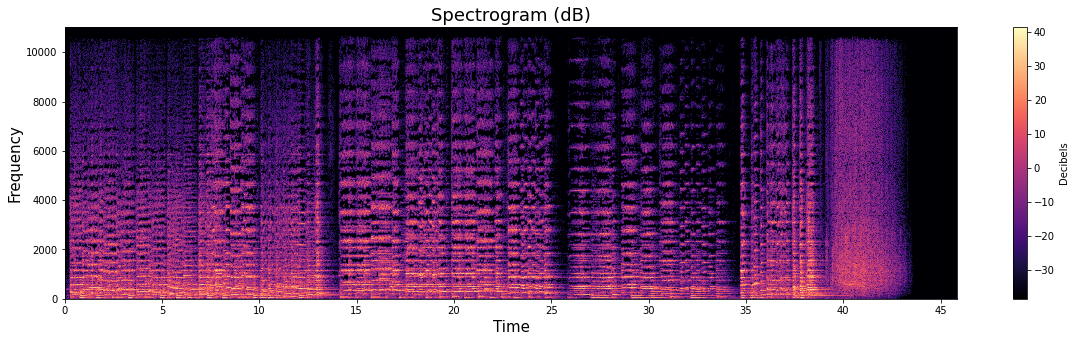

In [ ]:
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
# gathering the absolute values for all values in our audio_stft 
spectrogram = np.abs(audio_stft)
# Converting the amplitude to decibels
log_spectro = librosa.amplitude_to_db(spectrogram)
# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))
# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(log_spectro, sr=sr, x_axis= 'time' , y_axis='hz', hop_length=hop_length, cmap='magma')
plt.colorbar(label= 'Decibels')
plt.title('Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()


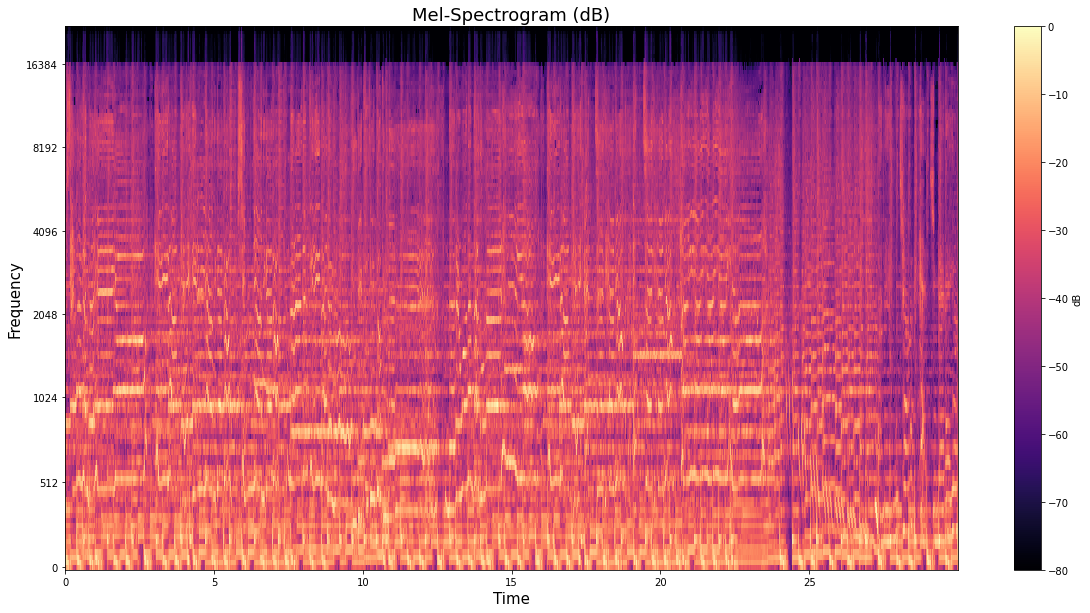

In [ ]:
plt.figure(figsize=(20, 10))
librosa.display.specshow(list[467], sr=sr, x_axis='time', y_axis='mel', cmap='magma', 
 hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()


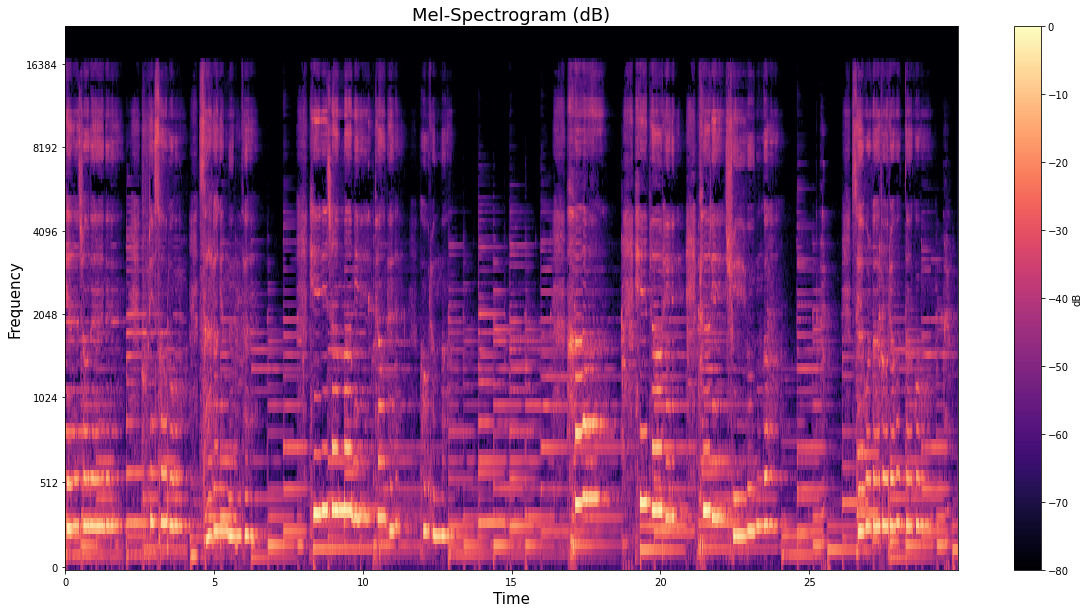

In [ ]:
plt.figure(figsize=(20, 10))
librosa.display.specshow(list[720], sr=sr, x_axis='time', y_axis='mel', cmap='magma', 
 hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()


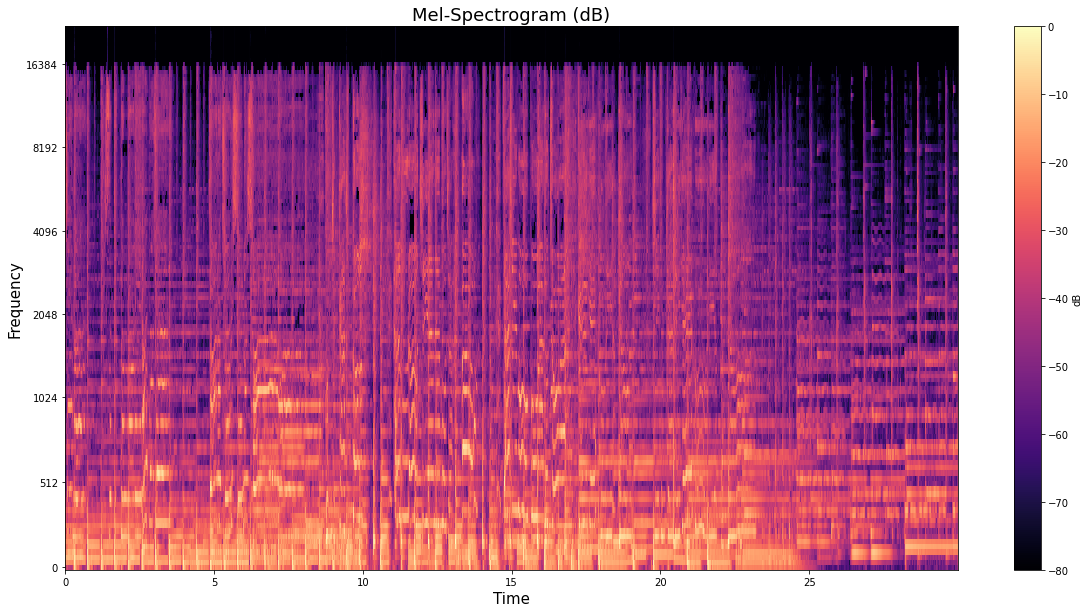

In [ ]:
plt.figure(figsize=(20, 10))
librosa.display.specshow(list[999], sr=sr, x_axis='time', y_axis='mel', cmap='magma', 
 hop_length=hop_length)
plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()


In [ ]:
for i in tqdm(audio_list):
    extract_feature_means(i)
    